# The Sparks Foundation - Task 2

In [1]:
__author__ = "Mrunal Salvi"
__email__ = "mrunalsalvi94@gmail.com"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.shape

(25, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
df = df.rename(columns ={'Scores':'Percentage'})

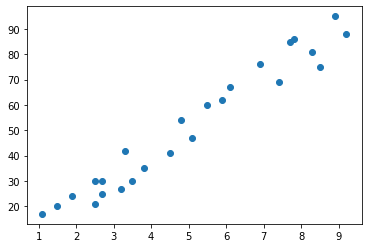

In [9]:
#Graphical plot

plt.scatter(x=df['Hours'],y=df['Percentage'])
plt.show()

### We see a linear relationship between 'Hours' and 'Percentage'

In [10]:
X = np.asarray(df['Hours'])
y = np.asarray(df['Percentage'])

X = X.reshape(-1,1)
y = y.reshape(-1,1)

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2, random_state=0)

In [11]:
X.shape

(25, 1)

In [12]:
y.shape

(25, 1)

### We face an error while fitting the model as the data needs to be reshaped using (-1,1)

In [13]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

train_score = linreg.score(X_train, y_train)
print('Train data score:',train_score)

test_score = linreg.score(X_val, y_val)
print('Test data score:',test_score)

Train data score: 0.9515510725211553
Test data score: 0.9454906892105356


In [14]:
y_pred = linreg.predict(X_val)
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

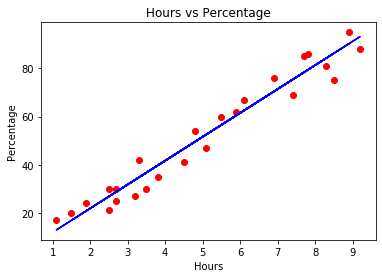

In [15]:
plt.scatter(X,y, color='red')
plt.plot(X, linreg.predict(X), color='blue')
plt.title('Hours vs Percentage')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.show()

### For quantitative data we use Error metrics as: MAE, MSE, RMSE, R2 etc.

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, r2_score

In [17]:
mae = mean_absolute_error(y_val, y_pred)
print('Mean Absolute Error (MAE):', mae)

Mean Absolute Error (MAE): 4.183859899002975


In [18]:
mse = mean_absolute_error(y_val, y_pred)
print('Mean Squared Error (MSE):', mse)

Mean Squared Error (MSE): 4.183859899002975


In [19]:
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print('Root Mean Squared Error (RMSE):', rmse)

Root Mean Squared Error (RMSE): 4.6474476121003665


In [20]:
r2 = r2_score(y_val, y_pred)
print('R squared score:', r2)

R squared score: 0.9454906892105356


### Final predictions

We need to check the predictions of Percentage made for an input of Hours studied. It is done as follows.

In [21]:
hrs_input = float(input('Number of Hours studied:'))
prediction = linreg.predict([[hrs_input]])
str_prediction = str(prediction)
print('\nFor {} hours of study, predicted percentage obtained is {}'.format(hrs_input,str_prediction[2:-2]))

Number of Hours studied:9.25

For 9.25 hours of study, predicted percentage obtained is 93.69173249
